In [3]:
"""
TIP: 
    1. Never use  [[0]*3]*3 for array assignment - This creates three duplicate list. Check out below code to view the weird result it gives:
        X = [[2]*3]*2
        X[0][0] = 3
        print(X)
        #Extremely weired!!! This is assigning to all the coloumn 0th element to 3.
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import *

#TODO: write model here
def model(N, MU, R, PHI, W, A, THETA, NEPOCHS):
    """
    Parameters:
    NEPOCHS: How long to run the model
    
    TODO: Later add Iext as well
    
    Return:
    W: Change in W
    PHI: Change in pahse
    N_PHI_DIFF: Normalized pahse difference
    
    Miscellaneous:
        1. Normalized pahse difference approaches zero ss individual oscillators attain equillibrium 
    """
    # Be careful while changing these assignment!! Check out TIP section
    DT = 0.01 # Time step
    
    PHI_ = [[0 for i in range(NEPOCHS)] for j in range(N)] #Capturing change of PHI over time
    R_ = [[0 for i in range(NEPOCHS)] for j in range(N)]   #Capturing change of R over time
    W_ = [[0 for i in range(NEPOCHS)] for j in range(N)]
    N_PHI_DIFF = [[[0 for t in range(NEPOCHS)] for j in range(N)] for i in range(N)]
    
    for t in range(NEPOCHS):
        # Why are they initializing R and THETA every epoch?
        
        for i in range(N):
            
            R[i] = R[i] + ( (MU - R[i]**2)*R[i] + sum( [ A[i][j]*(R[j]**(W[i]/W[j]))*cos( W[i]*( PHI[j]/W[j] - PHI[i]/W[i] + THETA[i][j]/(W[i]*W[j]) ) ) for j in range(N) if j != i] ) )*DT
            PHI[i] = PHI[i] + ( W[i] + sum( [ A[i][j]*( R[j]**(W[i]/W[j]) / R[i] )*sin( W[i]*( PHI[j]/W[j] - PHI[i]/W[i] + THETA[i][j]/(W[i]*W[j]) ) ) for j in range(N) if j != i] ) )*DT
            
            R_[i][t] = R[i]
            PHI_[i][t] = PHI[i]
            W_[i][t] = W[i] 
            #Heavy task
            for j in range(N):
                if j != i:
                    N_PHI_DIFF[i][j][t] = ( PHI[i]/W[i] - PHI[j]/W[j] - THETA[i][j]/(W[i]*W[j]) )
            
    return R, PHI, R_, PHI_, W_, N_PHI_DIFF

In [11]:
#Data structures
N = 2                 # Number of oscillators
MU = 1                # Oscillator parameter (>0 for supercritical)
R = [0 for i in range(N)]             # R vector in polar coordinates for N oscillators
PHI = [0 for i in range(N)]           # Ф vector for N oscillators
W = [0 for i in range(N)]             # Natural frequencies of N oscillators
A = [[0 for i in range(N)] for j in range(N)]         # NxN connectivity matrix for N oscillators
THETA = [[0 for i in range(N)] for j in range(N)]     # NxN phase angle difference in complex coupling

NEPOCHS = 2000

def initialize(N, R, PHI, W, A, THETA):
    """
    Parameters:
    R:     Initialize everything to 1
    PHI:   2*pi*rand(n, 1) - Uniformly distributed random number from 0 - 2ℼ 
    W:     { 0.01 + 45*2*pi*rand(n,1) - Given} For now assign in steps of 5
    A:     Randomly assign betwwn 0-1 uniformly distributed (TODO: constrain this later)
    THETA: Randomly assign between 0 - 2ℼ uniformly distributed
    
    Constrain:
    θ12 = -θ21 = θ
    A12 = A21 = A
    MU = 1
    
    Return: 
    R, PHI, W, A, THETA
    """
    R = [2 for i in range(N)]
    PHI = 2*pi*np.random.rand(N)
    #PHI[0] = 3.7008 #Delete me
    #PHI[1] = 2.3106 #Delete me
    W = [5 + i*5 for i in range(N)]
    
    #(i) Aij = Aji (ii) Aii = 0
    A = np.random.rand(N)
    A = np.dot(A[:,None], A[None,:])
    #A.fill(0.05) #Delete me
    np.fill_diagonal(A, 0)
    print(A)
    
    #θ12 = -θ21 = θ
    THETA = 2*pi*np.random.rand(N, N)
    THETA = (THETA - THETA.T)
    #THETA[0][1] = 1.8968 #Delete me
    #THETA[1][0] = -1.8968 #Delete me
    print(THETA)
    
    return R, PHI, W, A, THETA
    

[[0.        0.5192483]
 [0.5192483 0.       ]]
[[ 0.          2.98838246]
 [-2.98838246  0.        ]]
1.261069433157239


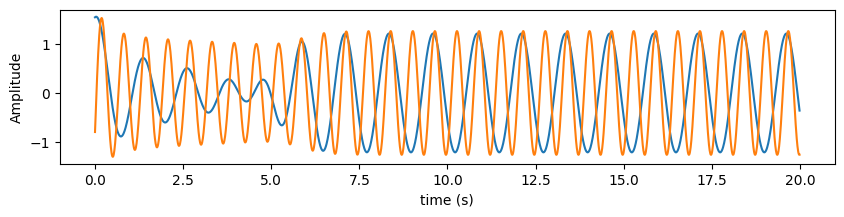

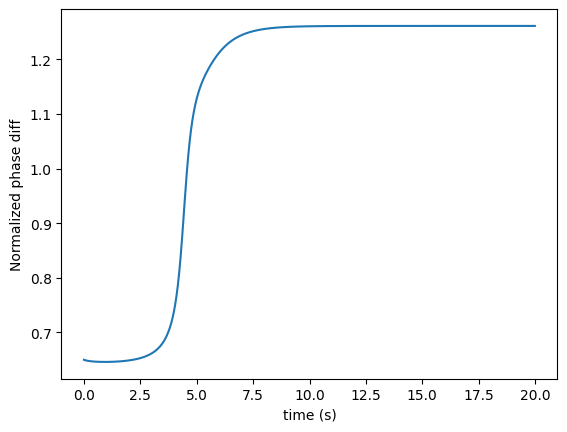

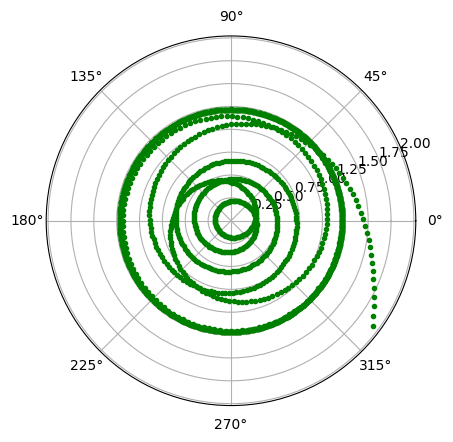

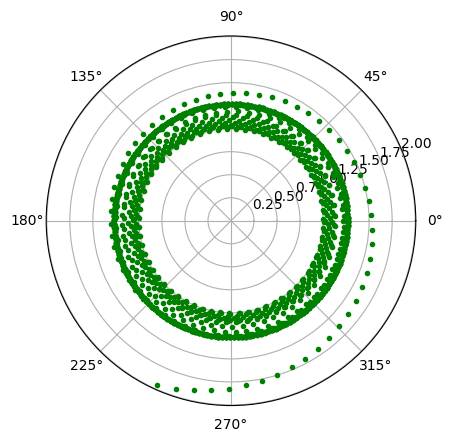

In [12]:
R, PHI, W, A, THETA = initialize(N, R, PHI, W, A, THETA)
R, PHI, R_, PHI_, W_, N_PHI_DIFF = model(N, MU, R, PHI, W, A, THETA, NEPOCHS)

t = np.multiply([i for i in range(NEPOCHS)], 0.01)

X = [np.multiply(R_[i], np.cos(PHI_[i])) for i in range(N)] 
#N_PHI_DIFF = np.multiply(PHI_[0], 1/W[0]) - np.multiply(PHI_[1], 1/W[1])
#N_PHI_DIFF = np.subtract(PHI_[0], PHI_[1]) #When frequency is same
#print(N_PHI_DIFF[NEPOCHS-1])
print(N_PHI_DIFF[0][1][NEPOCHS-1])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
for i in range(len(X)):
    plt.plot(t, X[i])
plt.show()

#plt.plot(t, W_[0])
#plt.plot(t, W_[1])

plt.xlabel("time (s)")
plt.ylabel("Normalized phase diff")
plt.plot(t, N_PHI_DIFF[0][1])
plt.show()

plt.axes(projection = 'polar')
plt.polar(PHI_[0], R_[0], 'g.')
plt.show()
plt.polar(PHI_[1], R_[1], 'g.')
plt.show()
